In [1]:
from qiskit import IBMQ, execute, transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.ibmq.job import job_monitor
from qiskit.circuit.random import random_circuit

from qiskit.test.mock import FakeMumbai as FakeDevice
from qiskit.providers.aer.noise import NoiseModel

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('simulator_statevector')

In [3]:
# list all jobs which have been executed from our provider in the past
for job in backend.jobs():
    print(job.job_id())
    job_monitor(job)


6071af284ee21e9c69b00def
Job Status: job has been cancelled
6071aedeb8a875d20aee87eb
Job Status: job has been cancelled
6071ae16bb1d88c21b08cab5
Job Status: job has been cancelled
60707bd3d9a6cb0eb34266bb
Job Status: job has successfully run
60706f0e8e1d071686671fc9
Job Status: job has successfully run
60704f00b8a875d2e6ee7d28
Job Status: job has successfully run


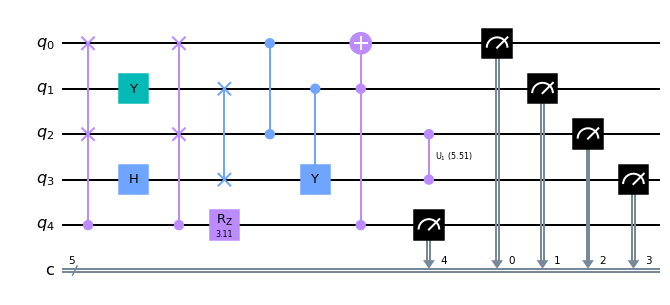

In [4]:
qc = random_circuit(num_qubits=5, depth=4, measure=True)
qc.draw(output='mpl')

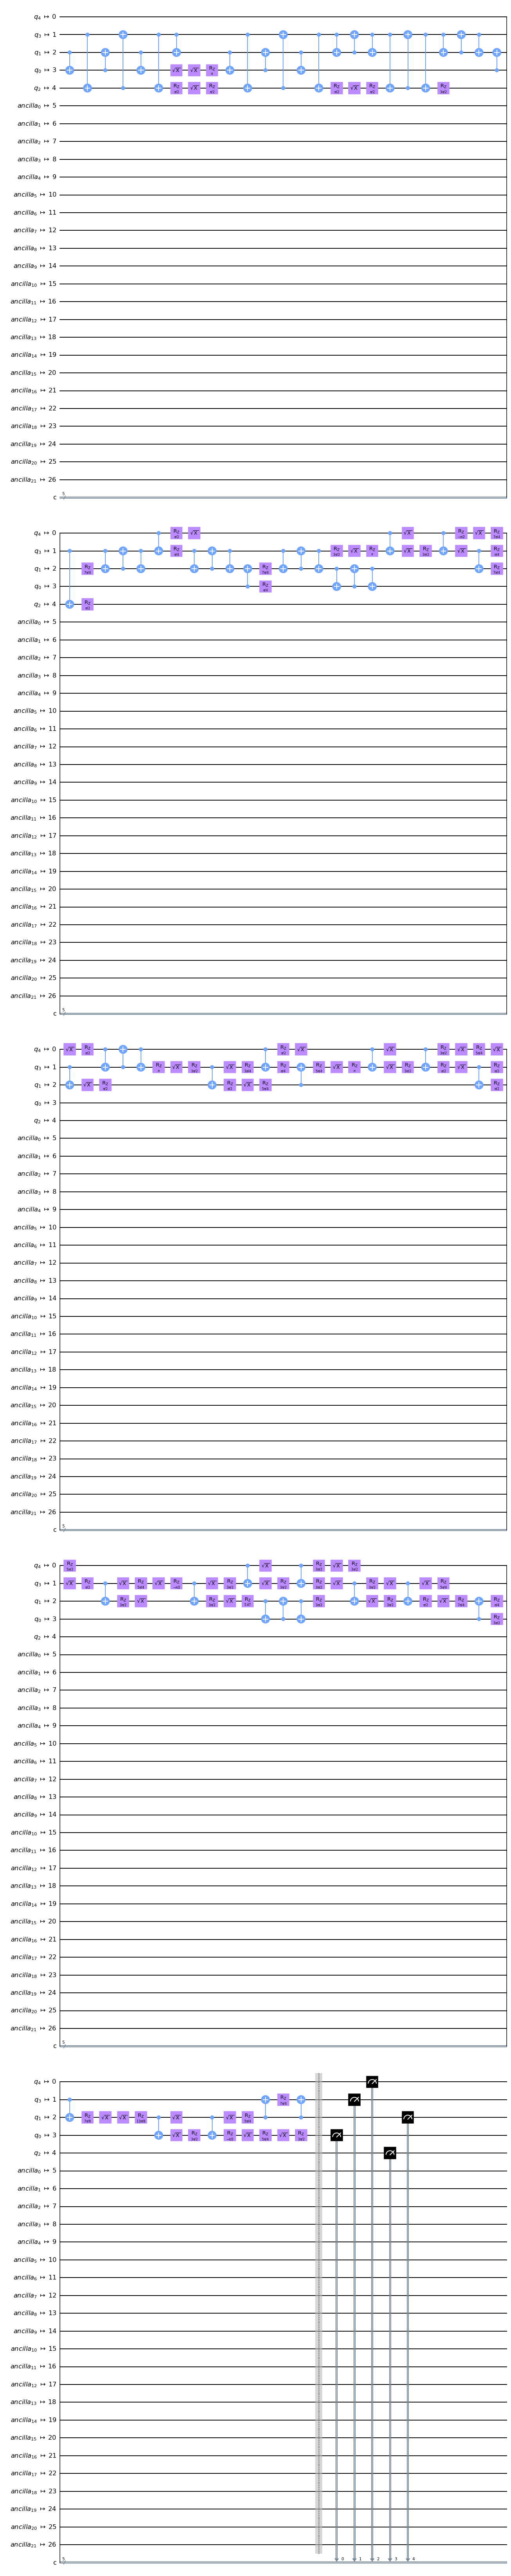

In [5]:
device = FakeDevice() 
noise_model = NoiseModel.from_backend(device)
coupling_map=device.configuration().coupling_map
basis_gates=device.configuration().basis_gates
circuit_transpiled = transpile(qc, backend=device, optimization_level=3, coupling_map=coupling_map, basis_gates=basis_gates)
shots = 4096
circuit_transpiled.draw(output='mpl')

In [8]:
# job_manager = IBMQJobManager()
# job_set_test = job_manager.run([circuit_transpiled], backend=backend, name='test_set', shots=shots, noise_model=noise_model)

# this does not work

/home/tom/anaconda3/envs/Qiskit_Ocean/lib/python3.8/site-packages/qiskit/providers/ibmq/managed/managedjob.py:114: DeprecationWarning: run keyword argument qobj is deprecated and replaced with circuits.
  self.job = backend.run(
/home/tom/anaconda3/envs/Qiskit_Ocean/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:810: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,


In [7]:
job = execute(qc, backend, shots=shots,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model)
job_monitor(job)

Job Status: job has successfully run


In [8]:
counts = job.result().get_counts(0)
counts

{'00000': 261,
 '00001': 84,
 '10000': 64,
 '10001': 33,
 '10010': 53,
 '10011': 90,
 '10100': 39,
 '10101': 19,
 '10110': 39,
 '10111': 58,
 '11000': 148,
 '11001': 42,
 '11010': 27,
 '11011': 41,
 '11100': 88,
 '11101': 45,
 '11110': 25,
 '11111': 15,
 '00010': 722,
 '00011': 141,
 '00100': 83,
 '00101': 67,
 '00110': 151,
 '00111': 162,
 '01000': 790,
 '01001': 158,
 '01010': 165,
 '01011': 69,
 '01100': 169,
 '01101': 159,
 '01110': 47,
 '01111': 42}